# Logistic Regression model, based on  'Bank full Dataset' of a Portuguese bank to classify whether a customer will Subscribe a Term Deposite or not ?
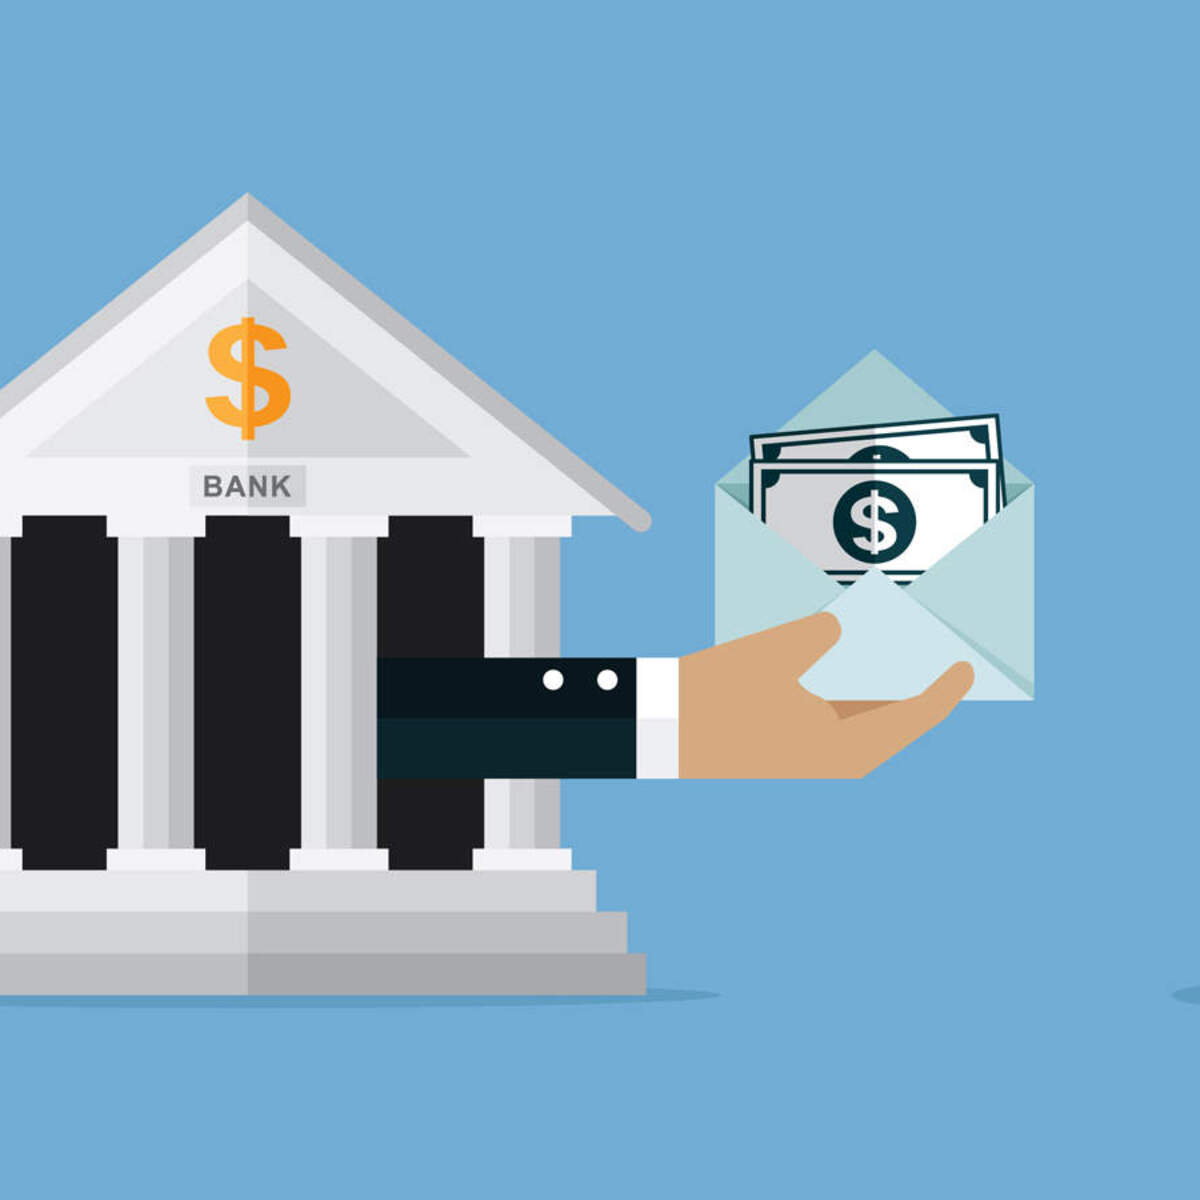

# Section 1
   # Problem Statement
Suppose a Bank wants to sell it's term deposit product to customers and before launching the product they want to develop a model which help them in understanding whether a particular customer will buy their product or not (based on customer's past interaction with bank or other Financial Institution).

Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. The money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing, and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call. Here the target is whether customer will invest in term deposit or not.Its basically a classification problem so I'll use logistic regression model as my classifier.

# Section 2
# Dataset  Source   
 
I have taken the dataset from https://www.kaggle.com/datasets/krantiswalke/bankfullcsv 

# Data Description 

This file contains 45211 instances and 17 features, the description of these features are given below..

1) age (numeric)

2) job : type of job 
                                        (categorical:admin.','bluecollar','entrepreneur','housemaid','management','retired','selfemployed','services','student','technician','unemployed','unknown')

3) marital : marital status (categorical:'divorced','married','single' note: 'divorced' means divorced or widowed)

4) education (categorical: 'tertiary', 'secondary', 'unknown', 'primary')

5) default: has credit in default? (categorical: 'no','yes')

6) balance: average yearly balance, in euros (numeric)

7) housing: has housing loan? (categorical: 'no','yes')

8) loan: has personal loan? (categorical: 'no','yes')

9) contact: contact communication type (categorical:'cellular','telephone')

10) day: last contact day of the month (numeric 1 -31)

11) month: last contact month of year (categorical: 'jan', 'feb','mar', …, 'nov', 'dec')

12) duration: last contact duration, in seconds (numeric).

13) campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14) pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric)

15) previous: number of contacts performed before this campaign and for this client (numeric)

16) poutcome: outcome of the previous marketing campaign(categorical: 'unknown', 'failure', 'other', 'success')

17) target: has the client subscribed a term deposit? (binary:"yes","no")


# Section 3
 # Major Findings 
 
 
 
 


from the EDA portion I got some visualization 

1) Most of the people are from the age group around 32-48

2) Persons having job type blue-collar,management & technician are mostly disagrees to subscribe but comparatively management job type persons have higher chance have subscription

3) Those who contacted last time on december , march,september & october are mostly subscribed for term deposite.

4) persons who are mostly agreed to take subscription are from single & married groups

5) Persons who agrees to take subscription are largely belongs to education type like secondary & tertiary.

6) Persons who didn't subscribed are mostly from those who have taken housing loans.

7) here I can only say that faliure persons didn't agrees to subscribe where only successfull persons are mostly agrees to subscribe rather than telling 'NO' ,which is so obvious.


 Now from the logistic regression part with 4 different optimizer I can say 


1) Before going deep into the model building with categorical variable, we must have to focus on the multicollinearity of features.

2) Gradient Descent gave the lowest accuracy among the 4 different optimizers, number of correctly classified observations are 28772 for train data and 7145 for the test data with accuracy 79.55098429550983 % & 79.01139002543404 % respectively

3) Newton-CG and LBFGS optimizer gave the same accuracy.  number of correctly classified observations are 32577	 for train data and 8187 for the test data with accuracy 90.07133377571334 % & 90.53411478491651 % respectively

4) Stochastic- Gradient Descent gave slightly better accuracy than remaining 3 optimizers number of correctly classified observations are 32593 for train data and 8194 for the test data with accuracy 90.11557177615572 %  & 90.61152272475948 % respectively


5) As Binary cross Entropy loss is a convex function so we don't need further optimizer to minimize it, but I have used only 4 different optimizer just to verify it and its verified now.

7) in GD algorithm Training loss falls down faster than test loss but amount of test loss is lesser than training loss.

8) in SGD algorithm amount of loss for test set is lower than train set and the loss function curve has constantly decreased till epoch around 1 then it gets slowly reduce comparatively lower but constant rate till epoch around 2 , then it decreased again constanly.

#  Section 4
# Data pre processing




Importing Libraries

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import sklearn.metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import statsmodels.api as sm

In [194]:
df=pd.read_csv('E:/python/CDS/bank-full.csv');df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [4]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [5]:
df_categorical=df[df.columns[[1,2,3,4,6,7,8,10,15,16]]];df_categorical

,job,marital,education,default,housing,loan,contact,month,poutcome,Target
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [6]:
df_numeric=df[df.columns[[0,5,9,11,12,13,14]]];df_numeric

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [7]:
for x in df_categorical.columns:
    #prinfting unique values
    print(x ,':', len(df_categorical[x].unique()))

job : 12
marital : 3
education : 4
default : 2
housing : 2
loan : 2
contact : 3
month : 12
poutcome : 4
Target : 2


In [9]:
print(df.groupby(df['job'])['job'].count(),"\n")

job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: job, dtype: int64 



In [10]:
print(df.groupby(df['education'])['education'].count(),"\n")

education
primary       6851
secondary    23202
tertiary     13301
unknown       1857
Name: education, dtype: int64 



In [11]:
print(df.groupby(df['marital'])['marital'].count(),"\n")

marital
divorced     5207
married     27214
single      12790
Name: marital, dtype: int64 



# Some EDA

<AxesSubplot:xlabel='Target', ylabel='count'>

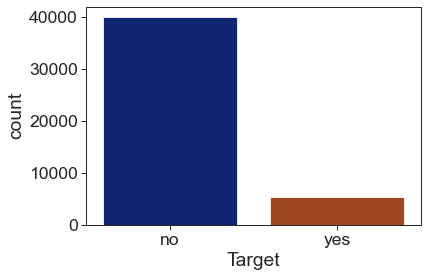

In [100]:
sns.set_context('paper', font_scale = 2) 
sns.set_style('ticks') 
sns.countplot(x =df['Target'], data = df, palette ='dark')

 there are massive number of clients who disagrees to subscribed the term deposite , very few clients agrees to subscribe it

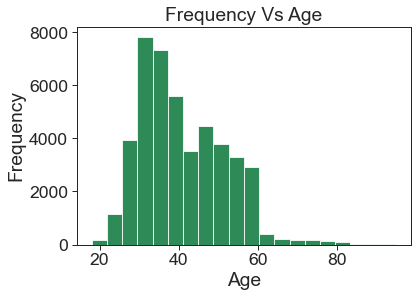

In [19]:
df.age.plot.hist(bins=20,color='seagreen')
plt.title('Frequency Vs Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

 Most of the people are from the age group around 32-48 

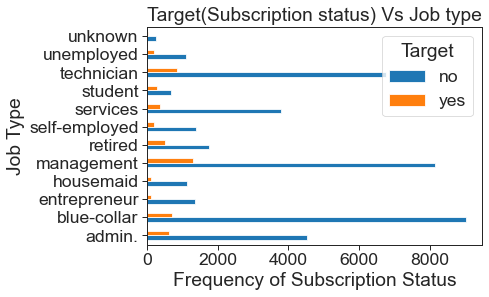

In [49]:
pd.crosstab(df.job,df.Target).plot(kind='barh')
plt.title('Target(Subscription status) Vs Job type')
plt.xlabel('Frequency of Subscription Status')
plt.ylabel('Job Type')
plt.show()

Persons having job type blue-collar,management & technician are mostly disagrees to subscribe but comparatively management job type persons have higher chance have subscription

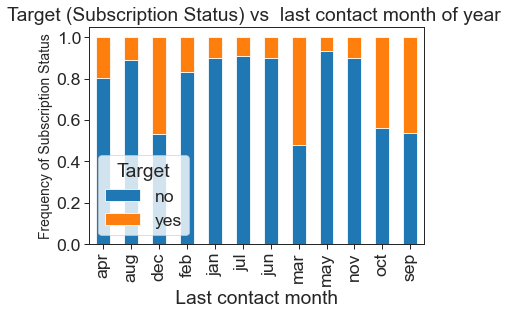

In [51]:
month = pd.crosstab(df.month,df.Target)
month.div(month.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Target (Subscription Status) vs  last contact month of year ')
plt.xlabel(' Last contact month ')
plt.ylabel('Frequency of Subscription Status',fontsize=14)
plt.show()

 Those who contacted last time on december , march,september & october are mostly subscribed for term deposite

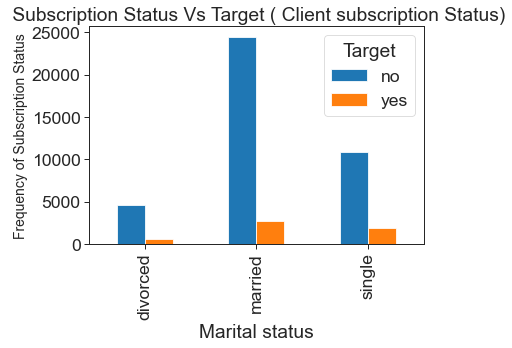

In [52]:
pd.crosstab(df.marital,df.Target).plot(kind='bar')
plt.title(' Subscription Status Vs Target ( Client subscription Status)')
plt.xlabel('Marital status')
plt.ylabel('Frequency of Subscription Status',fontsize=14)
plt.show()

beside disagreement, persons who are mostly agreed to take subscription are from single & married groups

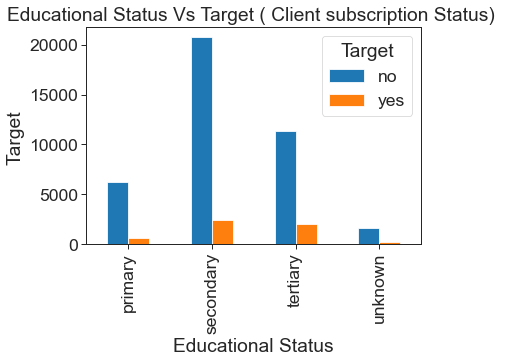

In [53]:
pd.crosstab(df.education,df.Target).plot(kind='bar')
plt.title('Educational Status Vs Target ( Client subscription Status) ')
plt.xlabel('Educational Status')
plt.ylabel('Target ')
plt.show()

Persons who agrees to take subscription are largely belongs from education level secondary & tertiary

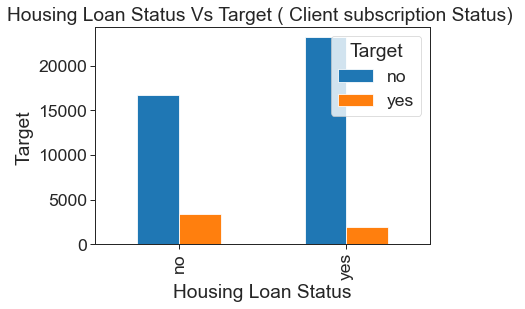

In [64]:
pd.crosstab(df.housing,df.Target).plot(kind='bar')
plt.title('Housing Loan Status Vs Target ( Client subscription Status) ')
plt.xlabel('Housing Loan Status')
plt.ylabel('Target ')
plt.show()

persons who didn't subscribed are mostly from those who have taken housing loans 

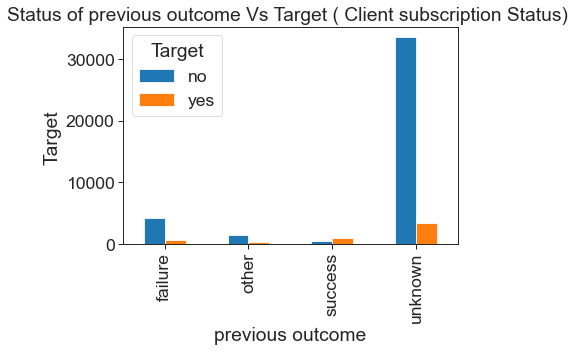

In [198]:
pd.crosstab(df.poutcome ,df.Target).plot(kind='bar')
plt.title('Status of previous outcome Vs Target ( Client subscription Status) ')
plt.xlabel('previous outcome')
plt.ylabel('Target ')
plt.show()

here I can only say that faliure persons didn't agrees to subscribe where only successfull persons are mostly agrees to subscribe rather than telling 'NO' ,which is so obvious.

Now to deal with the Categorical data first we need to one-hot-encode all the categorical columns

# Why One-Hot Encoding ?

For categorical variables where no such ordinal relationship exists, the integer encoding is not enough.

In fact, using this encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results (predictions halfway between categories).

In this case, a one-hot encoding can be applied to the integer representation. This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value.

In [101]:
df_hot_encode = pd.get_dummies(df_categorical,drop_first=True);df_hot_encode

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,Target_yes
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,1
45207,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45208,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
45209,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [102]:
df=pd.concat([df_numeric,df_hot_encode],axis=1);df

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,Target_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,1,0,0,0,1,0,1
45209,57,668,17,508,4,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [103]:
X=df.drop(df.columns[[42]],axis=1);X

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,0,1,0,0,0,1,0
45209,57,668,17,508,4,-1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [104]:

y=df['Target_yes']

# Why VIF ( Variance Inflation Factor)?
 
Due to One-Hot Encoding ,Dummy Variable Trap is a scenario in which variables are highly correlated to each other.

The Dummy Variable Trap leads to the problem known as multicollinearity. Multicollinearity occurs where there is a dependency between the independent features. Multicollinearity is a serious issue in Regression Problem

So, in order to overcome the problem of multicollinearity, we need to drop some dummy columns
One of the common ways to check for multicollinearity is the Variance Inflation Factor (VIF):

 i) VIF=1, Very Less Multicollinearity
 
ii) VIF<5, Moderate Multicollinearity

iii) VIF>5, Extreme Multicollinearity (This is what we have to avoid)


I took the code from this site https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/ to create the VIF function



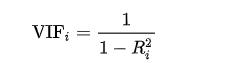

where the $R_{i}^2$ is the coefficient of determination of the regression equation with  $X_{i}$ and all other predictor variables (all the other X variables).
From this relation we can say that VIF will increase with the increase of $R_{i}^2$ 

In [105]:
# Function to calculate VIF
def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = data.columns
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)


Compute the VIF scores:

In [106]:
calculate_vif(X)

,Var,Vif
0,age,19.41
2,day,5.90
5,pdays,4.13
3,duration,2.02
4,campaign,2.01
6,previous,1.48
1,balance,1.26
29,month_dec,1.08
34,month_mar,0.54
37,month_oct,0.38


Here, the feature 'age' & 'day'  have VIF more than 5.

So to increase the accuracy we must have to drop the 'age' & 'day' column from the encoded feature vector due to multicollinearity

In [110]:

X.drop(columns =['age','day'],inplace=True)

In [118]:
scaler = preprocessing.StandardScaler().fit(X)
X= scaler.transform(X) #scaling of data#  can be used np.array

# Section 5

# Model

In [119]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)

# Logistic Regression with Gradient Descent Algorithm

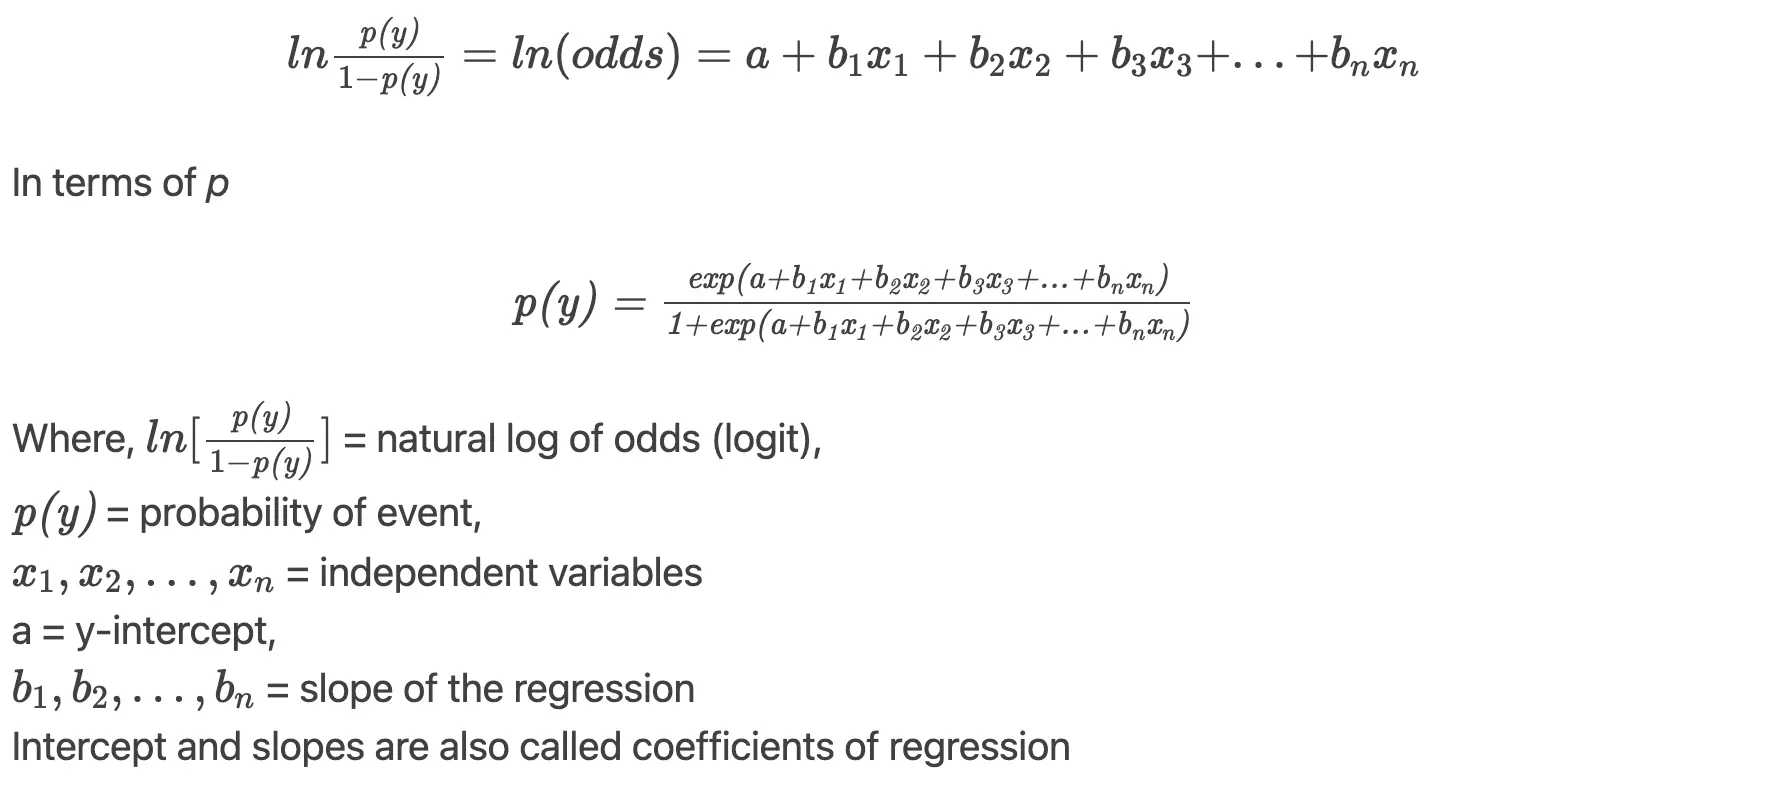

and here is our loss function for logistic regression model which is also known as Binary-Cross-Entropy Loss, which we have to be minimize
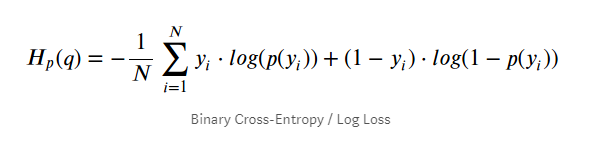

Why Logistic Regression is used  ?

We know that Logistic regression is a simple but very powerful algorithm to solve binary classification problems .We can use it to predict the probability of a target variable. Here the nature of target or dependent variable is dichotomous, which means there would be only two possible classes.

In [124]:
#     Features:(n_examples, n_features)
#     Labels: (n_examples, 1)
#     Weights:(n_features, 1)


# -- Sigmoid function -- #
def sigmoid(z):
    final_label = 1/(1+np.exp(-z))
    return final_label

# -- Predictor function -- #
def predict(features, weights):
    '''
    Returns probabilities
    of class label
    '''
    z = np.dot(features, weights)
    return sigmoid(z)

# -- Cost function -- #
def cost_function(features, labels, weights):
    '''    
    Write down the average cross-entropy loss
    '''
    observations = len(labels)
    #print("number",observations)

    predictions = predict(features, weights)

    # You may use this format or define in your own way
    # Note: This is for binary cros-entropy loss.
    
    # We can divide the binary cross entropy loss into two parts
    # One for p(y=1) and another for p(y=0)

    # Take the error when label=1
    class1_cost = np.dot(labels, np.log(predictions))

    # Take the error when label=0
    class2_cost = np.dot(1-labels, np.log(1-predictions))
    
    # Take the sum of both costs
    cost = class1_cost + class2_cost

    # Take the average cost
    cost = -cost.sum()/observations

    return cost


def update_weights(features, labels, weights, lr):
    '''
   Gradient Descent
    '''
    N = features.shape[1]

    #1 - Get Predictions
    predictions = predict(features,weights)
    
    # Write down the gradient of the cost
    gradient = np.dot((predictions-labels), features)

    # 3 Take the average cost derivative for each feature
    gradient /= N

    # 4 Update the weights using the learning rate lr
    weights = weights - (lr*gradient)

    return weights

def decision_boundary(prob):
    return 1 if prob >= .5 else 0 # You may change the threshold from 0.5 

def train(features, labels, weights, lr, iters):
    cost_history = [np.float64('inf')]

    for i in range(iters):
        weights = update_weights(features, labels, weights, lr)

        #Calculate error for auditing purposes
        cost = cost_function(features, labels, weights)
        
        cost_history.append(cost)

        print("iter: "+str(i) + " cost: "+str(cost))

    return weights, cost_history
def test(features, labels, weights, lr, iters):
    cost_history = [np.float64('inf')]

    for i in range(iters):
        weights = update_weights(features, labels, weights, lr)

        #Calculate error for auditing purposes
        cost = cost_function(features, labels, weights)
        
        cost_history.append(cost)

        print("iter: "+str(i) + " cost: "+str(cost))

    return weights, cost_history

def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))


In [125]:
# Initialize the weights
wts = np.zeros(X.shape[1])

# Training
optimal_wts, train_loss = train(X_train, y_train, wts, .001, 2000) #.000000001, 2000

iter: 0 cost: 0.6599338510876175
iter: 1 cost: 0.6461389104894724
iter: 2 cost: 0.6381165794563171
iter: 3 cost: 0.6328791405083785
iter: 4 cost: 0.629258081541631
iter: 5 cost: 0.626656545880069
iter: 6 cost: 0.6247320081346328
iter: 7 cost: 0.623274305531603
iter: 8 cost: 0.6221482045534363
iter: 9 cost: 0.6212633894182796
iter: 10 cost: 0.6205576955098735
iter: 11 cost: 0.6199872540396903
iter: 12 cost: 0.619520452898181
iter: 13 cost: 0.6191341038509693
iter: 14 cost: 0.6188109360032732
iter: 15 cost: 0.6185379137132805
iter: 16 cost: 0.6183050821970709
iter: 17 cost: 0.6181047596462983
iter: 18 cost: 0.6179309620852838
iter: 19 cost: 0.6177789877106823
iter: 20 cost: 0.6176451124761411
iter: 21 cost: 0.617526364513026
iter: 22 cost: 0.6174203552144792
iter: 23 cost: 0.6173251515630457
iter: 24 cost: 0.6172391788187873
iter: 25 cost: 0.6171611457836105
iter: 26 cost: 0.6170899870065021
iter: 27 cost: 0.6170248178054171
iter: 28 cost: 0.616964899057575
iter: 29 cost: 0.6169096094850

iter: 247 cost: 0.6158436371300587
iter: 248 cost: 0.6158435692526704
iter: 249 cost: 0.6158435029179354
iter: 250 cost: 0.61584343809003
iter: 251 cost: 0.6158433747339872
iter: 252 cost: 0.6158433128156776
iter: 253 cost: 0.6158432523017878
iter: 254 cost: 0.6158431931597982
iter: 255 cost: 0.6158431353579643
iter: 256 cost: 0.6158430788653003
iter: 257 cost: 0.6158430236515557
iter: 258 cost: 0.6158429696871999
iter: 259 cost: 0.6158429169434022
iter: 260 cost: 0.6158428653920184
iter: 261 cost: 0.6158428150055703
iter: 262 cost: 0.6158427657572292
iter: 263 cost: 0.6158427176208039
iter: 264 cost: 0.6158426705707192
iter: 265 cost: 0.6158426245820057
iter: 266 cost: 0.6158425796302835
iter: 267 cost: 0.6158425356917455
iter: 268 cost: 0.6158424927431471
iter: 269 cost: 0.6158424507617898
iter: 270 cost: 0.6158424097255091
iter: 271 cost: 0.6158423696126604
iter: 272 cost: 0.6158423304021079
iter: 273 cost: 0.6158422920732111
iter: 274 cost: 0.6158422546058135
iter: 275 cost: 0.6158

iter: 486 cost: 0.6158406206336208
iter: 487 cost: 0.6158406203050513
iter: 488 cost: 0.6158406199836309
iter: 489 cost: 0.6158406196692032
iter: 490 cost: 0.6158406193616156
iter: 491 cost: 0.6158406190607194
iter: 492 cost: 0.6158406187663684
iter: 493 cost: 0.6158406184784199
iter: 494 cost: 0.6158406181967351
iter: 495 cost: 0.6158406179211772
iter: 496 cost: 0.6158406176516125
iter: 497 cost: 0.6158406173879108
iter: 498 cost: 0.6158406171299436
iter: 499 cost: 0.6158406168775865
iter: 500 cost: 0.6158406166307178
iter: 501 cost: 0.6158406163892168
iter: 502 cost: 0.6158406161529673
iter: 503 cost: 0.6158406159218549
iter: 504 cost: 0.6158406156957678
iter: 505 cost: 0.6158406154745957
iter: 506 cost: 0.6158406152582327
iter: 507 cost: 0.6158406150465733
iter: 508 cost: 0.6158406148395158
iter: 509 cost: 0.6158406146369593
iter: 510 cost: 0.6158406144388063
iter: 511 cost: 0.61584061424496
iter: 512 cost: 0.6158406140553279
iter: 513 cost: 0.6158406138698176
iter: 514 cost: 0.6158

iter: 729 cost: 0.6158406055850452
iter: 730 cost: 0.6158406055834545
iter: 731 cost: 0.6158406055818982
iter: 732 cost: 0.6158406055803765
iter: 733 cost: 0.6158406055788871
iter: 734 cost: 0.61584060557743
iter: 735 cost: 0.6158406055760046
iter: 736 cost: 0.6158406055746098
iter: 737 cost: 0.6158406055732457
iter: 738 cost: 0.6158406055719113
iter: 739 cost: 0.615840605570605
iter: 740 cost: 0.6158406055693276
iter: 741 cost: 0.6158406055680777
iter: 742 cost: 0.6158406055668549
iter: 743 cost: 0.6158406055656584
iter: 744 cost: 0.6158406055644879
iter: 745 cost: 0.6158406055633437
iter: 746 cost: 0.6158406055622231
iter: 747 cost: 0.6158406055611272
iter: 748 cost: 0.615840605560055
iter: 749 cost: 0.6158406055590064
iter: 750 cost: 0.6158406055579799
iter: 751 cost: 0.6158406055569758
iter: 752 cost: 0.6158406055559941
iter: 753 cost: 0.615840605555033
iter: 754 cost: 0.6158406055540926
iter: 755 cost: 0.6158406055531727
iter: 756 cost: 0.615840605552273
iter: 757 cost: 0.61584060

iter: 974 cost: 0.6158406055119847
iter: 975 cost: 0.6158406055119773
iter: 976 cost: 0.61584060551197
iter: 977 cost: 0.6158406055119628
iter: 978 cost: 0.6158406055119557
iter: 979 cost: 0.6158406055119493
iter: 980 cost: 0.6158406055119421
iter: 981 cost: 0.6158406055119361
iter: 982 cost: 0.6158406055119299
iter: 983 cost: 0.6158406055119231
iter: 984 cost: 0.615840605511917
iter: 985 cost: 0.6158406055119111
iter: 986 cost: 0.6158406055119053
iter: 987 cost: 0.6158406055118996
iter: 988 cost: 0.615840605511894
iter: 989 cost: 0.6158406055118889
iter: 990 cost: 0.6158406055118834
iter: 991 cost: 0.615840605511878
iter: 992 cost: 0.6158406055118731
iter: 993 cost: 0.6158406055118677
iter: 994 cost: 0.6158406055118628
iter: 995 cost: 0.6158406055118582
iter: 996 cost: 0.6158406055118535
iter: 997 cost: 0.6158406055118487
iter: 998 cost: 0.6158406055118443
iter: 999 cost: 0.61584060551184
iter: 1000 cost: 0.6158406055118358
iter: 1001 cost: 0.6158406055118317
iter: 1002 cost: 0.615840

iter: 1211 cost: 0.6158406055116432
iter: 1212 cost: 0.6158406055116434
iter: 1213 cost: 0.6158406055116432
iter: 1214 cost: 0.6158406055116431
iter: 1215 cost: 0.615840605511643
iter: 1216 cost: 0.615840605511643
iter: 1217 cost: 0.6158406055116429
iter: 1218 cost: 0.6158406055116428
iter: 1219 cost: 0.6158406055116432
iter: 1220 cost: 0.6158406055116429
iter: 1221 cost: 0.6158406055116425
iter: 1222 cost: 0.6158406055116428
iter: 1223 cost: 0.6158406055116431
iter: 1224 cost: 0.6158406055116428
iter: 1225 cost: 0.6158406055116432
iter: 1226 cost: 0.615840605511643
iter: 1227 cost: 0.6158406055116425
iter: 1228 cost: 0.6158406055116427
iter: 1229 cost: 0.6158406055116433
iter: 1230 cost: 0.6158406055116433
iter: 1231 cost: 0.6158406055116432
iter: 1232 cost: 0.6158406055116429
iter: 1233 cost: 0.6158406055116428
iter: 1234 cost: 0.6158406055116427
iter: 1235 cost: 0.615840605511643
iter: 1236 cost: 0.615840605511643
iter: 1237 cost: 0.6158406055116425
iter: 1238 cost: 0.61584060551164

iter: 1446 cost: 0.6158406055116417
iter: 1447 cost: 0.6158406055116414
iter: 1448 cost: 0.6158406055116417
iter: 1449 cost: 0.6158406055116418
iter: 1450 cost: 0.6158406055116419
iter: 1451 cost: 0.6158406055116418
iter: 1452 cost: 0.6158406055116418
iter: 1453 cost: 0.6158406055116415
iter: 1454 cost: 0.6158406055116418
iter: 1455 cost: 0.6158406055116413
iter: 1456 cost: 0.6158406055116415
iter: 1457 cost: 0.6158406055116414
iter: 1458 cost: 0.6158406055116415
iter: 1459 cost: 0.6158406055116411
iter: 1460 cost: 0.6158406055116418
iter: 1461 cost: 0.6158406055116413
iter: 1462 cost: 0.6158406055116417
iter: 1463 cost: 0.6158406055116418
iter: 1464 cost: 0.6158406055116418
iter: 1465 cost: 0.6158406055116418
iter: 1466 cost: 0.6158406055116417
iter: 1467 cost: 0.6158406055116414
iter: 1468 cost: 0.615840605511642
iter: 1469 cost: 0.6158406055116414
iter: 1470 cost: 0.6158406055116417
iter: 1471 cost: 0.615840605511642
iter: 1472 cost: 0.6158406055116419
iter: 1473 cost: 0.61584060551

iter: 1680 cost: 0.6158406055116414
iter: 1681 cost: 0.6158406055116417
iter: 1682 cost: 0.6158406055116415
iter: 1683 cost: 0.6158406055116419
iter: 1684 cost: 0.6158406055116419
iter: 1685 cost: 0.6158406055116419
iter: 1686 cost: 0.6158406055116411
iter: 1687 cost: 0.6158406055116414
iter: 1688 cost: 0.6158406055116413
iter: 1689 cost: 0.6158406055116413
iter: 1690 cost: 0.6158406055116414
iter: 1691 cost: 0.6158406055116413
iter: 1692 cost: 0.6158406055116414
iter: 1693 cost: 0.6158406055116413
iter: 1694 cost: 0.6158406055116414
iter: 1695 cost: 0.6158406055116411
iter: 1696 cost: 0.6158406055116413
iter: 1697 cost: 0.615840605511642
iter: 1698 cost: 0.6158406055116417
iter: 1699 cost: 0.6158406055116418
iter: 1700 cost: 0.6158406055116418
iter: 1701 cost: 0.6158406055116418
iter: 1702 cost: 0.6158406055116417
iter: 1703 cost: 0.6158406055116414
iter: 1704 cost: 0.6158406055116415
iter: 1705 cost: 0.6158406055116414
iter: 1706 cost: 0.6158406055116411
iter: 1707 cost: 0.6158406055

iter: 1917 cost: 0.6158406055116418
iter: 1918 cost: 0.6158406055116418
iter: 1919 cost: 0.6158406055116412
iter: 1920 cost: 0.6158406055116412
iter: 1921 cost: 0.6158406055116414
iter: 1922 cost: 0.6158406055116414
iter: 1923 cost: 0.6158406055116413
iter: 1924 cost: 0.6158406055116414
iter: 1925 cost: 0.6158406055116415
iter: 1926 cost: 0.6158406055116415
iter: 1927 cost: 0.6158406055116417
iter: 1928 cost: 0.6158406055116418
iter: 1929 cost: 0.6158406055116418
iter: 1930 cost: 0.6158406055116419
iter: 1931 cost: 0.6158406055116418
iter: 1932 cost: 0.6158406055116412
iter: 1933 cost: 0.6158406055116413
iter: 1934 cost: 0.6158406055116413
iter: 1935 cost: 0.6158406055116413
iter: 1936 cost: 0.6158406055116413
iter: 1937 cost: 0.6158406055116414
iter: 1938 cost: 0.6158406055116415
iter: 1939 cost: 0.6158406055116415
iter: 1940 cost: 0.6158406055116415
iter: 1941 cost: 0.6158406055116415
iter: 1942 cost: 0.6158406055116415
iter: 1943 cost: 0.6158406055116419
iter: 1944 cost: 0.615840605

In [126]:
predictions = []
for elem in predict(X, optimal_wts):
    predictions.append(decision_boundary(elem))

In [127]:
train_predictions = []
for i in predict(X_train, optimal_wts):
    train_predictions.append(decision_boundary(i))
test_predictions = []
for i in predict(X_test, optimal_wts):
    test_predictions.append(decision_boundary(i))

In [128]:
print("Train Accuracy using gradient descent: {} %".format(accuracy(train_predictions,y_train)*100))  

Train Accuracy using gradient descent: 79.55098429550983 %


In [129]:
print("Test Accuracy using gradient descent: {} %".format(accuracy(test_predictions,y_test)*100))  

Test Accuracy using gradient descent: 79.01139002543404 %


In [30]:
opt_wts1,test_loss=test(X_test,y_test, wts, .001, 2000)

iter: 0 cost: 0.6825696121062871
iter: 1 cost: 0.6740982302959837
iter: 2 cost: 0.6672061532368019
iter: 3 cost: 0.6615061935434223
iter: 4 cost: 0.6567174301432149
iter: 5 cost: 0.652636129729233
iter: 6 cost: 0.6491134414258223
iter: 7 cost: 0.6460393000515371
iter: 8 cost: 0.643331132448573
iter: 9 cost: 0.64092601461836
iter: 10 cost: 0.6387752265438983
iter: 11 cost: 0.6368404509611845
iter: 12 cost: 0.6350910964517774
iter: 13 cost: 0.6335023921431738
iter: 14 cost: 0.632054015595593
iter: 15 cost: 0.6307290923806873
iter: 16 cost: 0.6295134573580408
iter: 17 cost: 0.6283951021685253
iter: 18 cost: 0.6273637566990196
iter: 19 cost: 0.6264105680192317
iter: 20 cost: 0.6255278510448904
iter: 21 cost: 0.6247088925868048
iter: 22 cost: 0.6239477955891654
iter: 23 cost: 0.6232393539652096
iter: 24 cost: 0.6225789509872389
iter: 25 cost: 0.6219624760065195
iter: 26 cost: 0.6213862555878894
iter: 27 cost: 0.6208469960951734
iter: 28 cost: 0.6203417354609989
iter: 29 cost: 0.619867802390

iter: 261 cost: 0.609744705580285
iter: 262 cost: 0.609741844248053
iter: 263 cost: 0.6097390073689708
iter: 264 cost: 0.6097361946656726
iter: 265 cost: 0.6097334058649961
iter: 266 cost: 0.6097306406979006
iter: 267 cost: 0.6097278988993858
iter: 268 cost: 0.6097251802084156
iter: 269 cost: 0.6097224843678399
iter: 270 cost: 0.6097198111243213
iter: 271 cost: 0.6097171602282623
iter: 272 cost: 0.609714531433734
iter: 273 cost: 0.6097119244984074
iter: 274 cost: 0.6097093391834851
iter: 275 cost: 0.6097067752536356
iter: 276 cost: 0.6097042324769292
iter: 277 cost: 0.6097017106247734
iter: 278 cost: 0.6096992094718535
iter: 279 cost: 0.6096967287960703
iter: 280 cost: 0.6096942683784824
iter: 281 cost: 0.609691828003249
iter: 282 cost: 0.6096894074575718
iter: 283 cost: 0.6096870065316429
iter: 284 cost: 0.6096846250185881
iter: 285 cost: 0.6096822627144171
iter: 286 cost: 0.6096799194179692
iter: 287 cost: 0.6096775949308662
iter: 288 cost: 0.6096752890574604
iter: 289 cost: 0.609673

iter: 498 cost: 0.6094266578920585
iter: 499 cost: 0.6094261072519321
iter: 500 cost: 0.6094255599156784
iter: 501 cost: 0.6094250158610165
iter: 502 cost: 0.6094244750658417
iter: 503 cost: 0.6094239375082224
iter: 504 cost: 0.6094234031664005
iter: 505 cost: 0.6094228720187873
iter: 506 cost: 0.6094223440439642
iter: 507 cost: 0.6094218192206792
iter: 508 cost: 0.6094212975278468
iter: 509 cost: 0.6094207789445456
iter: 510 cost: 0.6094202634500173
iter: 511 cost: 0.6094197510236647
iter: 512 cost: 0.6094192416450503
iter: 513 cost: 0.609418735293895
iter: 514 cost: 0.6094182319500766
iter: 515 cost: 0.609417731593628
iter: 516 cost: 0.6094172342047361
iter: 517 cost: 0.6094167397637409
iter: 518 cost: 0.6094162482511326
iter: 519 cost: 0.6094157596475518
iter: 520 cost: 0.6094152739337871
iter: 521 cost: 0.6094147910907745
iter: 522 cost: 0.6094143110995947
iter: 523 cost: 0.6094138339414737
iter: 524 cost: 0.6094133595977801
iter: 525 cost: 0.6094128880500242
iter: 526 cost: 0.6094

iter: 753 cost: 0.6093528544315957
iter: 754 cost: 0.6093527228523982
iter: 755 cost: 0.6093525919718584
iter: 756 cost: 0.609352461786056
iter: 757 cost: 0.6093523322910942
iter: 758 cost: 0.6093522034830996
iter: 759 cost: 0.6093520753582226
iter: 760 cost: 0.6093519479126366
iter: 761 cost: 0.6093518211425379
iter: 762 cost: 0.6093516950441465
iter: 763 cost: 0.6093515696137043
iter: 764 cost: 0.6093514448474767
iter: 765 cost: 0.6093513207417509
iter: 766 cost: 0.6093511972928366
iter: 767 cost: 0.6093510744970662
iter: 768 cost: 0.6093509523507935
iter: 769 cost: 0.6093508308503947
iter: 770 cost: 0.6093507099922673
iter: 771 cost: 0.6093505897728307
iter: 772 cost: 0.6093504701885262
iter: 773 cost: 0.6093503512358154
iter: 774 cost: 0.609350232911182
iter: 775 cost: 0.6093501152111306
iter: 776 cost: 0.609349998132186
iter: 777 cost: 0.6093498816708951
iter: 778 cost: 0.6093497658238242
iter: 779 cost: 0.6093496505875605
iter: 780 cost: 0.6093495359587117
iter: 781 cost: 0.60934

iter: 1000 cost: 0.609334551920258
iter: 1001 cost: 0.6093345151950197
iter: 1002 cost: 0.6093344786544715
iter: 1003 cost: 0.6093344422976559
iter: 1004 cost: 0.6093344061236203
iter: 1005 cost: 0.609334370131418
iter: 1006 cost: 0.6093343343201066
iter: 1007 cost: 0.6093342986887494
iter: 1008 cost: 0.6093342632364143
iter: 1009 cost: 0.6093342279621744
iter: 1010 cost: 0.6093341928651083
iter: 1011 cost: 0.6093341579442983
iter: 1012 cost: 0.6093341231988333
iter: 1013 cost: 0.609334088627806
iter: 1014 cost: 0.6093340542303141
iter: 1015 cost: 0.6093340200054606
iter: 1016 cost: 0.6093339859523529
iter: 1017 cost: 0.6093339520701031
iter: 1018 cost: 0.6093339183578295
iter: 1019 cost: 0.6093338848146526
iter: 1020 cost: 0.6093338514396996
iter: 1021 cost: 0.609333818232102
iter: 1022 cost: 0.6093337851909962
iter: 1023 cost: 0.6093337523155221
iter: 1024 cost: 0.6093337196048252
iter: 1025 cost: 0.6093336870580558
iter: 1026 cost: 0.6093336546743675
iter: 1027 cost: 0.6093336224529

iter: 1481 cost: 0.6093278169844392
iter: 1482 cost: 0.6093278135240968
iter: 1483 cost: 0.6093278100804008
iter: 1484 cost: 0.6093278066532708
iter: 1485 cost: 0.6093278032426259
iter: 1486 cost: 0.6093277998483863
iter: 1487 cost: 0.6093277964704719
iter: 1488 cost: 0.6093277931088037
iter: 1489 cost: 0.6093277897633028
iter: 1490 cost: 0.6093277864338903
iter: 1491 cost: 0.6093277831204885
iter: 1492 cost: 0.6093277798230193
iter: 1493 cost: 0.6093277765414057
iter: 1494 cost: 0.6093277732755705
iter: 1495 cost: 0.6093277700254367
iter: 1496 cost: 0.6093277667909287
iter: 1497 cost: 0.6093277635719702
iter: 1498 cost: 0.6093277603684859
iter: 1499 cost: 0.6093277571804006
iter: 1500 cost: 0.6093277540076397
iter: 1501 cost: 0.6093277508501286
iter: 1502 cost: 0.6093277477077935
iter: 1503 cost: 0.6093277445805605
iter: 1504 cost: 0.6093277414683566
iter: 1505 cost: 0.6093277383711084
iter: 1506 cost: 0.6093277352887438
iter: 1507 cost: 0.6093277322211905
iter: 1508 cost: 0.609327729

iter: 1710 cost: 0.609327335441552
iter: 1711 cost: 0.6093273342886416
iter: 1712 cost: 0.6093273331412294
iter: 1713 cost: 0.6093273319992888
iter: 1714 cost: 0.6093273308627939
iter: 1715 cost: 0.6093273297317181
iter: 1716 cost: 0.6093273286060358
iter: 1717 cost: 0.6093273274857209
iter: 1718 cost: 0.6093273263707477
iter: 1719 cost: 0.6093273252610907
iter: 1720 cost: 0.6093273241567242
iter: 1721 cost: 0.6093273230576229
iter: 1722 cost: 0.6093273219637618
iter: 1723 cost: 0.6093273208751152
iter: 1724 cost: 0.6093273197916589
iter: 1725 cost: 0.6093273187133671
iter: 1726 cost: 0.6093273176402157
iter: 1727 cost: 0.6093273165721801
iter: 1728 cost: 0.609327315509235
iter: 1729 cost: 0.609327314451357
iter: 1730 cost: 0.6093273133985211
iter: 1731 cost: 0.6093273123507033
iter: 1732 cost: 0.6093273113078796
iter: 1733 cost: 0.6093273102700263
iter: 1734 cost: 0.6093273092371192
iter: 1735 cost: 0.6093273082091345
iter: 1736 cost: 0.6093273071860493
iter: 1737 cost: 0.609327306167

iter: 1963 cost: 0.6093271656637479
iter: 1964 cost: 0.6093271653185003
iter: 1965 cost: 0.6093271649748903
iter: 1966 cost: 0.6093271646329097
iter: 1967 cost: 0.6093271642925512
iter: 1968 cost: 0.6093271639538065
iter: 1969 cost: 0.6093271636166688
iter: 1970 cost: 0.6093271632811298
iter: 1971 cost: 0.6093271629471821
iter: 1972 cost: 0.6093271626148181
iter: 1973 cost: 0.6093271622840303
iter: 1974 cost: 0.6093271619548107
iter: 1975 cost: 0.6093271616271525
iter: 1976 cost: 0.6093271613010482
iter: 1977 cost: 0.6093271609764905
iter: 1978 cost: 0.6093271606534714
iter: 1979 cost: 0.6093271603319842
iter: 1980 cost: 0.6093271600120214
iter: 1981 cost: 0.6093271596935756
iter: 1982 cost: 0.6093271593766398
iter: 1983 cost: 0.6093271590612068
iter: 1984 cost: 0.6093271587472695
iter: 1985 cost: 0.6093271584348207
iter: 1986 cost: 0.6093271581238531
iter: 1987 cost: 0.60932715781436
iter: 1988 cost: 0.6093271575063341
iter: 1989 cost: 0.6093271571997688
iter: 1990 cost: 0.60932715689

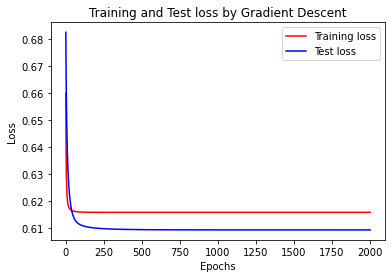

In [32]:
epochs=range(0,1999)
plt.plot(train_loss, 'r', label='Training loss')
plt.plot(test_loss, 'b', label='Test loss')
plt.title('Training and Test loss by Gradient Descent')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

 Training loss falls down faster than test loss but amount of test loss is lesser than training loss

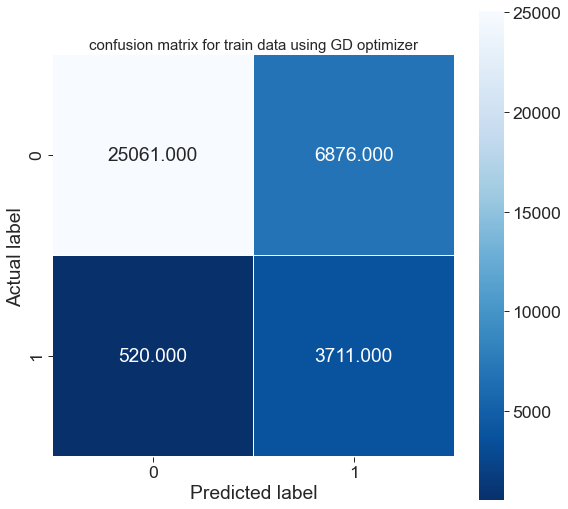

In [202]:
c1=confusion_matrix(y_true=y_train,y_pred=train_predictions)
plt.figure(figsize=(9,9))
sns.heatmap(c1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
#all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title('confusion matrix for train data using GD optimizer', size = 15);

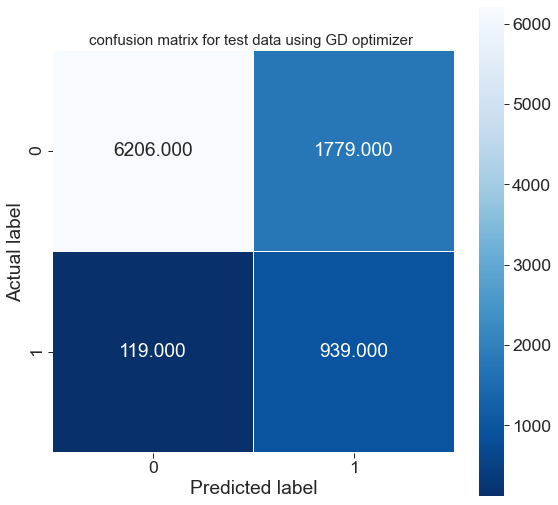

In [203]:
c2=confusion_matrix(y_true=y_test,y_pred=test_predictions)
plt.figure(figsize=(9,9))
sns.heatmap(c2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
#all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title('confusion matrix for test data using GD optimizer ', size = 15);

# Logistic from Sklearn

In [116]:
from sklearn.linear_model import LogisticRegression

# Newton-CG

Why Newton-CG ?

Gradient descent minimizes a function using knowledge of its derivative. Newton's method, a root finding algorithm, minimizes a function using knowledge of its second derivative. That can be faster when the second derivative is known and easy to compute

In [131]:
clf_newt = LogisticRegression(solver='newton-cg').fit(X_train, y_train)

In [137]:
predicted_newton1=clf_newt.predict(X_train)

In [138]:
predicted_newton=clf_newt.predict(X_test)

In [139]:
print("Train Accuracy using NEWTON-CG method: {} %".format(accuracy(predicted_newton1,y_train)*100))

Train Accuracy using NEWTON-CG method: 90.07133377571334 %


In [140]:
print("Test Accuracy using NEWTON-CG method: {} %".format(accuracy(predicted_newton,y_test)*100))

Test Accuracy using NEWTON-CG method: 90.53411478491651 %


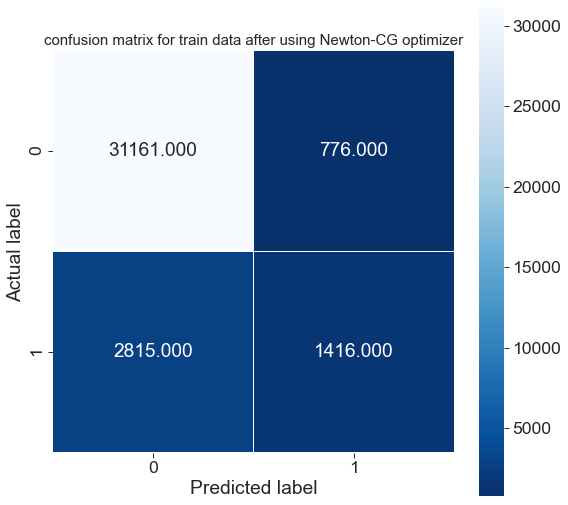

In [153]:
c3=confusion_matrix(y_true=y_train,y_pred=predicted_newton1)
plt.figure(figsize=(9,9))
sns.heatmap(c3, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
#all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title('confusion matrix for train data after using Newton-CG optimizer', size = 15);

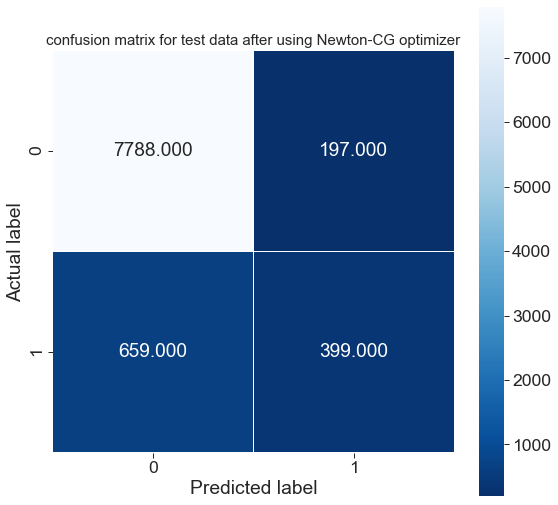

In [151]:
c4=confusion_matrix(y_true=y_test,y_pred=predicted_newton)
plt.figure(figsize=(9,9))
sns.heatmap(c4, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
#all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title('confusion matrix for test data after using Newton-CG optimizer', size = 15);

#  LBFGS

Why LBFGS ?

 Newton’s Method is great, but each iteration is rather expensive because it involves the computation of the Hessian and inverting it. For high-dimensional problems, this can make Newton’s Method practically unusable. 
 
  but LBFGS requires an approximate Hessian, but it can be initialize with the identity matrix and then just calculate the rank-two updates to the approximate Hessian as we go, as long as we have gradient information available, preferably analytically rather than through finite differences. LBFGS is a quasi-Newton method, and will converge in fewer steps than CG.

In [142]:
clf_lbfgs=LogisticRegression(solver='lbfgs').fit(X_train, y_train)

In [143]:
predicted_lbfgs1=clf_lbfgs.predict(X_train)

In [144]:
predicted_lbfgs=clf_lbfgs.predict(X_test)

In [145]:
print("Train Accuracy using LBFGS method: {} %".format(accuracy(predicted_lbfgs1,y_train)*100))

Train Accuracy using LBFGS method: 90.07133377571334 %


In [146]:
print("Test Accuracy using LBFGS method: {} %".format(accuracy(predicted_lbfgs,y_test)*100))

Test Accuracy using LBFGS method: 90.53411478491651 %


We get the same accuracy as Newton-cg for both train and test data, so I didn't construct the confusion matrix here

# Logistic from PyTorch to use SGD as its optimizer 

In [154]:
import torch
from torch import nn
from torch.nn import Parameter
from tqdm import tqdm

In [155]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
       
    def forward(self, x):
        outputs = torch.sigmoid(self.linear(x))
        return outputs

 I took the codes from the site https://towardsdatascience.com/logistic-regression-with-pytorch-3c8bbea594be 

In [156]:
X.shape

(45211, 40)

In [185]:
epochs=8000
input_dim=40
output_dim=1
learning_rate=0.01 # Standard Learning rate

In [173]:
model= LogisticRegression(input_dim, output_dim)
criterion=torch.nn.BCELoss()

In [174]:
y_train=np.array(y_train)
y_test=np.array(y_test)

In [175]:
X_train,X_test=torch.Tensor(X_train),torch.Tensor(X_test)
y_train,y_test=torch.Tensor(y_train),torch.Tensor(y_test)

# Optimize the loss funtion with SGD

Why SGD ?

 SGD is an extension of gradient descent algorithm where the stochasticity comes from employing a random subset of the measurements to compute the gradient at each descent. When one is dealing with large datasets ,especially in that case we can go for stochastic algorithms. Because, in stochastic settings, researchers only observe a subset of the data at a particular time.

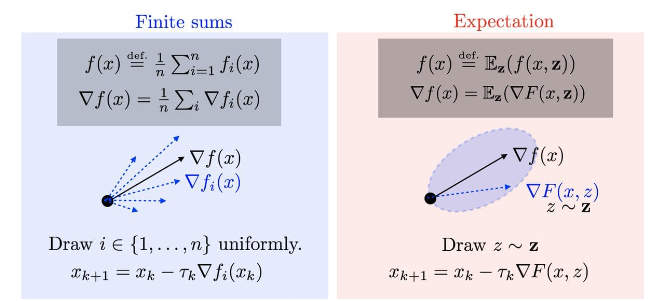

In [176]:
optimizer_SGD=torch.optim.SGD(model.parameters(),lr=learning_rate,)

In [177]:
losses = []
losses_test = []
Iterations = []
iter = 0
for epoch in tqdm(range(int(epochs)),desc='Training Epochs'):
    x = X_train
    labels = y_train
    optimizer_SGD.zero_grad() # Setting our stored gradients equal to zero
    outputs = model(X_train)
    loss = criterion(torch.squeeze(outputs), labels) # [200,1] -squeeze-> [200]
   
    loss.backward() # Computes the gradient of the given tensor w.r.t. graph leaves
   
    optimizer_SGD.step() # Updates weights and biases with the optimizer (SGD)
   
    iter+=1
    if iter%2000==0:
        # calculate Accuracy
        with torch.no_grad():
            # Calculating the loss and accuracy for the test dataset
            correct_test = 0
            total_test = 0
            outputs_test = torch.squeeze(model(X_test))
            loss_test = criterion(outputs_test, y_test)
           
            predicted_test = outputs_test.round().detach().numpy()
            total_test += y_test.size(0)
            correct_test += np.sum(predicted_test == y_test.detach().numpy())
            accuracy_test = 100 * correct_test/total_test
            losses_test.append(loss_test.item())
           
            # Calculating the loss and accuracy for the train dataset
            total = 0
            correct = 0
            total += y_train.size(0)
            correct += np.sum(torch.squeeze(outputs).round().detach().numpy() == y_train.detach().numpy())
            accuracy = 100 * correct/total
            losses.append(loss.item())
            Iterations.append(iter)
           
            print(f"Iteration: {iter}. \nTest - Loss: {loss_test.item()}. Accuracy: {accuracy_test}")
            print(f"Train -  Loss: {loss.item()}. Accuracy: {accuracy}\n")


Training Epochs:  25%|█████               | 2019/8000 [00:13<00:43, 138.30it/s]

Iteration: 2000. 
Test - Loss: 0.24860413372516632. Accuracy: 90.6668141103616
Train -  Loss: 0.25516700744628906. Accuracy: 90.06856890068569



Training Epochs:  50%|██████████          | 4013/8000 [00:26<00:25, 154.15it/s]

Iteration: 4000. 
Test - Loss: 0.23751278221607208. Accuracy: 90.62258100187991
Train -  Loss: 0.2444458156824112. Accuracy: 90.09068790090689



Training Epochs:  75%|███████████████     | 6017/8000 [00:41<00:12, 165.00it/s]

Iteration: 6000. 
Test - Loss: 0.23512551188468933. Accuracy: 90.56728961627779
Train -  Loss: 0.24189767241477966. Accuracy: 90.11833665118337



Training Epochs: 100%|████████████████████| 8000/8000 [00:51<00:00, 154.06it/s]

Iteration: 8000. 
Test - Loss: 0.23436468839645386. Accuracy: 90.61152272475948
Train -  Loss: 0.24092812836170197. Accuracy: 90.11557177615572



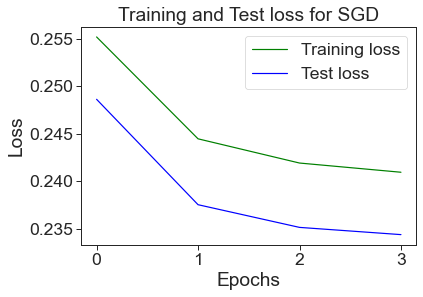

In [178]:
epochs=range(0,7999)
plt.plot(losses, 'g', label='Training loss')
plt.plot(losses_test, 'b', label='Test loss')
plt.title('Training and Test loss for SGD')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.GridSpec
plt.legend()
plt.show()

amount of loss for test set is lower than train set and the loss function curve has constantly decreased till epoch around 1 then it gets slowly reduce comparatively lower but constant rate till epoch around 2 , then it decreased again constanly.

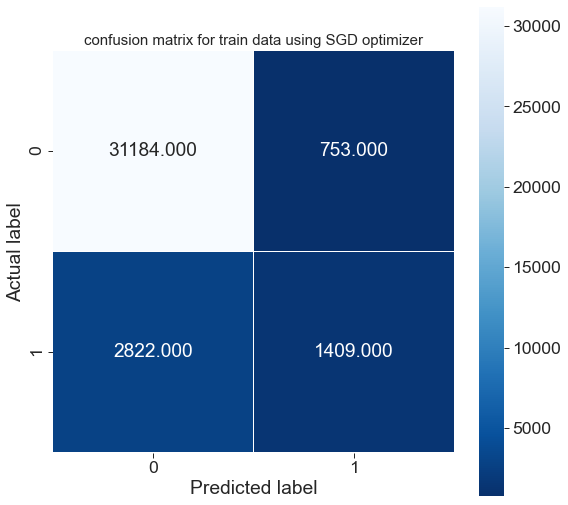

In [179]:
c6=confusion_matrix(y_true=y_train,y_pred=torch.squeeze(outputs).round().detach().numpy())
plt.figure(figsize=(9,9))
sns.heatmap(c6, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
#all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title('confusion matrix for train data using SGD optimizer', size = 15);

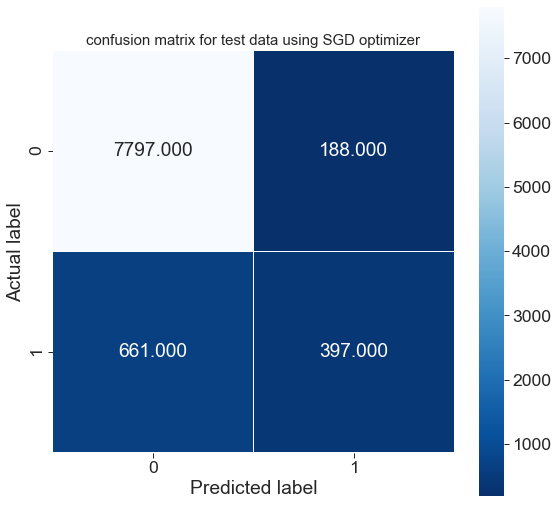

In [180]:
c5=confusion_matrix(y_true=y_test,y_pred=predicted_test)
plt.figure(figsize=(9,9))
sns.heatmap(c5, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
#all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title('confusion matrix for test data using SGD optimizer', size = 15);

# Section 6

# Results of various algorithms

In [184]:
pd.DataFrame({'Algorithm used to minimize the loss function':['Gradient Descent','Newton-Cg','LBFGS','SGD'],'Train Accuracy':['79.55098429550983 %','90.07133377571334 %','90.07133377571334 %','90.11557177615572 %'],'Test Accuracy':['79.01139002543404 %',' 90.53411478491651 %',' 90.53411478491651 %','90.61152272475948 %']})

,Algorithm used to minimize the loss function,Train Accuracy,Test Accuracy
0,Gradient Descent,79.55098429550983 %,79.01139002543404 %
1,Newton-Cg,90.07133377571334 %,90.53411478491651 %
2,LBFGS,90.07133377571334 %,90.53411478491651 %
3,SGD,90.11557177615572 %,90.61152272475948 %


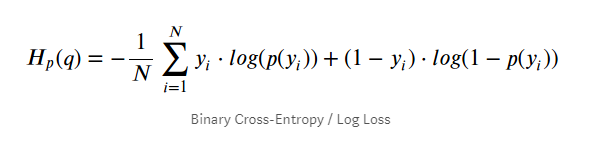

 Since Binary-Cross-Entropy (Loss function for logistic model) is a convex function so any optimization technique from convex optimization is guaranteed to find the global minimum . So here we can clearly see that Newton-Cg, LBFGS & SGD gives almost same accuracy if we observe train & test accuracy separately( Though SGD gives slightly better accuracy). We don't need to use other optimizers like ASGD, ADAM, RMS-prop etc

In [183]:
pd.DataFrame({'Algorithm used to minimize the loss function':['Gradient Descent','Newton-Cg','LBFGS','SGD'],'Correctly classified for Trained data':['28772','32577','32577','32593'],'Correctly classified for Test data':['7145','8187','8187','8194']})

,Algorithm used to minimize the loss function,Correctly classified for Trained data,Correctly classified for Test data
0,Gradient Descent,28772,7145
1,Newton-Cg,32577,8187
2,LBFGS,32577,8187
3,SGD,32593,8194
